# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name : Aryan Mikaeili<br/>
student number : 95105895

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [132]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [133]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [134]:
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################
X = cancer["data"]
Y = cancer["target"]
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_p = scaler.fit_transform(X)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis = 0))
test_ratio = 0.2
validation_ratio = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size= test_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= validation_ratio /(1 - test_ratio))

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


# Ensemble Methods

## Problem 1. Bagging (15 points)


1 0.9649122807017544
2 0.9649122807017544
3 0.9649122807017544
4 0.9649122807017544
5 0.9824561403508771
6 0.9824561403508771
7 0.9824561403508771
8 0.9824561403508771
9 0.9824561403508771
10 1.0
11 0.9824561403508771
12 0.9824561403508771
13 0.9824561403508771
14 1.0
15 0.9824561403508771
16 0.9824561403508771
17 0.9824561403508771
18 0.9824561403508771
19 0.9824561403508771
20 0.9824561403508771
21 0.9824561403508771
22 0.9824561403508771
23 0.9824561403508771
24 0.9824561403508771
25 0.9824561403508771
26 0.9824561403508771
27 0.9824561403508771
28 0.9824561403508771
29 0.9824561403508771
30 0.9824561403508771
31 0.9824561403508771
32 0.9824561403508771
33 0.9824561403508771
34 0.9824561403508771
35 0.9824561403508771
36 0.9824561403508771
37 0.9824561403508771
38 0.9824561403508771
39 0.9824561403508771
40 0.9824561403508771
41 0.9824561403508771
42 0.9824561403508771
43 0.9824561403508771
44 0.9824561403508771
45 0.9824561403508771
46 0.9824561403508771
47 0.9824561403508771
48 0.

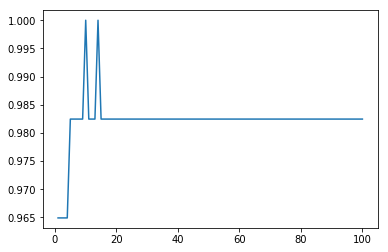

In [137]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
import sklearn
from sklearn.metrics import accuracy_score


################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
base_cls = None

X_train_biased = np.insert(X_train, 0, 1, axis=1)
X_val_biased = np.insert(X_val, 0, 1, axis=1)
X_test_biased = np.insert(X_test, 0, 1, axis = 1)
base_cls = sklearn.linear_model.Perceptron(tol=1e-3, random_state=0)

##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
def accuracy(preds, labels):
    return len(np.argwhere(preds == labels)) / len(labels)

num_cls = 10
seed = 22
 
max_num_cls = 100
accuracies = []
models = []
for num_cls in range(1,max_num_cls + 1):
    base_cls = sklearn.linear_model.Perceptron(tol=1e-3, random_state=seed)
    model = BaggingClassifier(base_estimator = base_cls,
                              n_estimators = num_cls,
                              random_state = seed)
    model.fit(X_train_biased,y_train)
    models.append(model)
    preds = model.predict(X_val_biased)
    print(num_cls, accuracy(preds, y_val))
    accuracies.append(accuracy(preds, y_val))


plt.plot([(i + 1) for i in range(0, max_num_cls)], accuracies)
################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
best_num = np.argmax(accuracies)
model = models[best_num]
preds = model.predict(X_test_biased)

print(accuracy(preds, y_test) * 100)
#print(accuracy_score(y_test, preds) * 100)


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################
min_depth = 5
max_depth = 20
min_num = 50
max_num = 150


rf = RandomForestClassifier( criterion="entropy", bootstrap=True, random_state=10, oob_score=True, max_features="auto")

best_accuracy = 0
best_depth = 5
best_num = 100


use_oob = True

if use_oob:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size= test_ratio)

for n in range(min_num, max_num, 10):
    for d in range(min_depth, max_depth):
        rf.set_params(n_estimators = n, max_depth = d)
        rf.fit(X_train, y_train)
        if use_oob:
            score = rf.oob_score_
        else:
            preds = rf.predict(X_val)
            score = accuracy_score(y_val, preds)

        if score > best_accuracy:
            best_accuracy = score
            best_depth = d
            best_num = n
       

rf.set_params(n_estimators = best_num, max_depth = best_depth)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)


#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################

print("accuracy : ", accuracy_score(y_test, preds) * 100)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


accuracy :  93.85964912280701
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92        46
           1       0.93      0.97      0.95        68

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

[[41  5]
 [ 2 66]]


Question:
Explain how you did choose the hyperparameters.</br>

The hyperparamater choosing method can be chosen by setting the use_oob variable to True or False. If set true, the code will use out of bag samples for validation, and if not, it will simply use the validation data. Ofcourse in the latter, we can merge the training and validation data, so the model can learn from a larger data, and get a better accuarcy. Also another advantage of this method is that for each tree at least 30% of the training data is out-of-bag data, so the model can validate on a data nearly 3 times larger than the 10% validation data we originally had.
In the out-of-bag validation method, the model will use each data value, on the trees that were not trained on that data(were not present in it's bootstrap), and predicts the value of it's label. finally the moddel will calculate the accuracy of the model on all the datapoints, using this method. We can then use this accuracy to find the best hyperparamaters for our model.
For the model, I used the values between 5 to 20 for the maximum depth of each tree and valuse between 50 to 150 for the number of trees. Then I did a grid search on these values(checked every combination of the two) and chose the best hyperparameters.


## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["target"], cancer["data"]], columns = np.append(["target"], cancer["feature_names"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
cancer.target = np.where(cancer.target==0, -1, cancer.target)

X = cancer["data"]
Y = cancer["target"]
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis = 0))

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size= test_ratio)

######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################

accuracy =cross_validate(Tree_model,X_train, y_train, cv=4, return_train_score=True)
train_accuracy = np.mean(accuracy['train_score'])
test_accuracy = np.mean(accuracy['test_score'])
print('The training data accuracy is:' ,train_accuracy * 100 , '%')
print('The test data accuracy is:' ,test_accuracy * 100 , '%')



The training data accuracy is: 92.52692459398742 %
The test data accuracy is: 88.78667908709828 %


In [129]:
class AdaBoost:

    def __init__(self, train_data_X, train_data_y, tree_num, test_data_X, test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None

    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = np.ones(self.train_data_X.shape[0]) * (1 / self.train_data_X.shape[0])

        alphas = []  # list of alphas
        models = []  # list of trained models
        for t in range(self.tree_num):
            ## TODO: create a weak decisiontree classifier
            Tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X, self.train_data_y, sample_weight=Evaluation['weights'])

            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X, self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W.
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['target'], 1, 0)
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['target'], 1, 0)


            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = np.count_nonzero(Evaluation['evaluation']) / Evaluation['evaluation'].shape[0]
            misclassification = 1 - accuracy
            err = np.dot(Evaluation['weights'], Evaluation['misclassified'])
            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = 0.5 * np.log2((1 - err) / err)
            alphas.append(alpha)
            ## TODO: update the weights
            Evaluation['weights'] = Evaluation['weights'] * np.exp(-1 * alpha * (Evaluation['predictions'] * Evaluation['target']))
            Evaluation['weights'] = Evaluation['weights'] / np.sum(Evaluation['weights'])


        self.alphas = alphas
        self.models = models

    def predict(self):
        predictions = []
        #####################################################################################
        # TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        for alpha, model in zip(self.alphas, self.models):
            prediction = alpha * model.predict(self.test_data_X)
            predictions.append(prediction)
            multiple_model_preds = np.sign(np.sum(np.array(predictions), axis=0))
            self.accuracy.append(accuracy_score(self.test_data_y, multiple_model_preds))
        

        self.predictions = np.sign(np.sum(np.array(predictions), axis=0))


With a number of  100 base models we receive an accuracy of  100.0 %


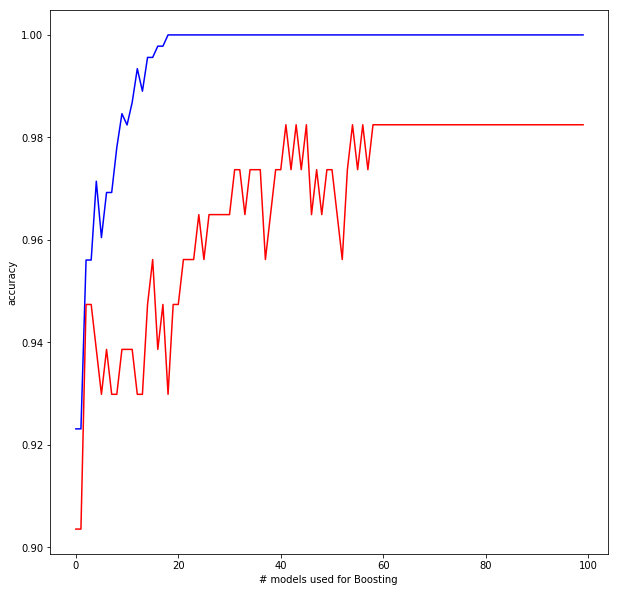

With a number of  100 base models we receive an accuracy of  98.24561403508771 %


In [130]:
# Accuracy - number of base learners plot for training data

number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


model = AdaBoost(X_train,y_train,number_of_base_learners,X_train,y_train)
model.fit()
model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
 
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
#################################################################### 
model = AdaBoost(X_train,y_train,number_of_base_learners,X_test,y_test)
model.fit()
accuracies = model.predict()
ax0.plot(range(len(model.accuracy)),model.accuracy,'-r')
plt.show()  
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')

# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [78]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size= test_ratio)
features = np.array(features)
###1
corrs = []
for i in range(X_train.shape[1]):
    current_col = X_train[:,i]
    corr = np.corrcoef(current_col, y_train)
    corrs.append([np.abs(corr[0][1]), i])

corrs_sorted = np.array(sorted(corrs, reverse=True))
###2
selected = corrs_sorted[np.where(corrs_sorted[:, 0] > 0.5)]
feature_indexes = selected[:,1].astype(int)
print("part 1: " , features[feature_indexes])

###3
X_selected = X_train[:,feature_indexes]
corr_mat = np.corrcoef(X_selected.T)
num_less = np.array(np.unique(np.argwhere(np.abs(corr_mat) < 0.5)[:,0], return_counts=True))
sorted_num_less = num_less[:, num_less[1].argsort()]
top_all = feature_indexes[np.flip(sorted_num_less[0], axis = 0)]
top3 = top_all[:3]
print("part2 (top 3): ", features[top3])
print("part2 all: ", features[top_all])

###4
X_train_biased = np.insert(X_train, 0, 1, axis=1)
X_test_biased = np.insert(X_test, 0, 1, axis = 1)
clf = Perceptron(tol=1e-3)
clf.fit(X_train_biased, y_train)

preds = clf.predict(X_test_biased)
print("part4(accuracy of perceptron):", accuracy_score(y_test, preds))
sorted_weight_features = features[np.abs(clf.coef_[0,1:]).argsort()]
print("part4(sorted features): ", sorted_weight_features)
##5
num_similar_part2 = 0
for f in features[feature_indexes]:
    if f in sorted_weight_features[0:15]:
        num_similar_part2 += 1
num_similar_part3 = 0
for f in features[top3]:
    if f in sorted_weight_features[0:15]:
        num_similar_part3 += 1

print(num_similar_part2, num_similar_part3)

###6
X_selected = np.insert(X_selected, 0, 1, axis=1)
clf.fit(X_selected, y_train)
X_test_new = X_test[:, feature_indexes]
X_test_new = np.insert(X_test_new, 0, 1, axis=1)
preds = clf.predict(X_test_new)
print("part6(accuracy of perceptron):", accuracy_score(y_test, preds))

###7
X_selected = np.insert(X_train[:, top3], 0, 1, axis=1)
clf.fit(X_selected, y_train)
X_test_new = X_test[:, top3]
X_test_new = np.insert(X_test_new, 0, 1, axis=1)
preds = clf.predict(X_test_new)
print("part7(accuracy of perceptron):", accuracy_score(y_test, preds))




        



part 1:  ['worst concave points' 'worst perimeter' 'worst radius'
 'mean concave points' 'mean perimeter' 'worst area' 'mean radius'
 'mean area' 'mean concavity' 'worst concavity' 'mean compactness'
 'worst compactness' 'radius error' 'perimeter error' 'area error']
part2 (top 3):  ['worst compactness' 'area error' 'worst concavity']
part2 all:  ['worst compactness' 'area error' 'worst concavity' 'perimeter error'
 'radius error' 'mean compactness' 'mean area' 'mean radius' 'worst area'
 'mean perimeter' 'worst radius']
part4(accuracy of perceptron): 0.9824561403508771
part4(sorted features):  ['worst compactness' 'concave points error' 'worst fractal dimension'
 'mean symmetry' 'texture error' 'mean smoothness' 'smoothness error'
 'concavity error' 'mean compactness' 'symmetry error' 'mean perimeter'
 'mean radius' 'fractal dimension error' 'worst concavity' 'mean area'
 'mean texture' 'mean fractal dimension' 'area error' 'perimeter error'
 'compactness error' 'mean concavity' 'wors

explanation of part 5 and 6:

As you can see in part 5, many of the features extracted in part 2 and 3 are among the features with the highest weights in the perceptron (i.e. they are more important in classification). This shows that features with more correlation with the label distribution, are more important in classification. also in part 6 you can see that the accuracy has not dropped signifficantly which showes that the features extracted are the more important ones in the course of classification.

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

Feature selection is important because:
<ul>
       <li> curse of dimentionality
       <li> overfitting: the more features we have there is a higher risk of overfitting
       <li> computational cost: most classification algorithms have exponential running time with respect to the dimention of the data.
       <li> the quality of data: There are many features in the original data that do not help classify the data
</ul>
So, yes. It is important to do feature selection before doing classification. of course due to the fact that decsision trees are more prone to overfitting, than for example, SVM, it is more important in this case to do feature selection.

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.

In [81]:
import pymrmr

cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["target"], cancer["data"]], columns = np.append(["target"], cancer["feature_names"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
cancer.target = np.where(cancer.target==0, -1, cancer.target)

#X = cancer["data"]
#Y = cancer["target"]

X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None



best_features = pymrmr.mRMR(df, 'MIQ', 15)
X = np.array(df[best_features])
Y = np.array(df["target"])

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size= test_ratio)

X_train_biased = np.insert(X_train, 0, 1, axis=1)
X_test_biased = np.insert(X_test, 0, 1, axis = 1)



clf = Perceptron(random_state=105)
clf.fit(X_train_biased, y_train)
preds = clf.predict(X_test_biased)
print(accuracy_score(y_test, preds))

0.9298245614035088
